# Clasificacion

# Modelo lineal (MCO)

* [Revisar Linear Regresion](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("Datos.xlsx", index_col = "Nombre")

In [6]:
df.head()

X1  X2  Y
Nombre               
Luis       400  20  0
Francisco  450  35  0
Maria      500  25  0
Alvaro     600  15  0
Soledad    600  30  0

In [8]:
#sklearn principal librerìa de python para machine learning
from sklearn.linear_model import LinearRegression #Regresion lineal
from sklearn.model_selection import train_test_split #para partir los datos
from sklearn.metrics import accuracy_score #Que tan bueno es el modelo

In [19]:
#Participacion de los datos entre entrenamiento y prueba
X = df[["X1", "X2"]]
Y = df[[ "Y" ]]
np.random.seed(1234)
#x_train 
#X_test 
#y_train
#Y_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [20]:
X_train

X1  X2
Nombre             
Soledad     600  30
Luis        400  20
Stella      550  45
Rocio      1050  60
Johanna     900  40
Sonia      1200  50
Esteban     700  35
Pedro       750  70
Juan       1000  40
Carolina    750  60
Carlos      900  55
Alexandra  1150  35
Ricardo     550  50
Yaneth      800  25
Edna       1050  45
Julian      850  65

In [21]:
X_test

X1  X2
Nombre            
Luz        850  15
Valentina  600  65
Maria      500  25
Alvaro     600  15
Francisco  450  35
Liliana    900  75
Sandra     700  25

In [22]:
Y_train

Y
Nombre      
Soledad    0
Luis       0
Stella     0
Rocio      1
Johanna    1
Sonia      1
Esteban    1
Pedro      1
Juan       0
Carolina   0
Carlos     1
Alexandra  1
Ricardo    1
Yaneth     0
Edna       1
Julian     1

In [23]:
Y_test

Y
Nombre      
Luz        0
Valentina  1
Maria      0
Alvaro     0
Francisco  0
Liliana    1
Sandra     0

In [24]:
# Crear el modelo y entrenarlo
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#En base a los valores de entrenamiento de X_test calcula la prediccion
#En base a la formula y = B(0) + sum(B(j)*x(j))
Y_pred1 = reg.predict(X_test)

In [27]:
Y_pred1

array([[0.25242303],
       [0.69050522],
       [0.08643439],
       [0.04108546],
       [0.17405082],
       [1.07399425],
       [0.25550444]])

In [28]:
Y_pred = np.rint(Y_pred1)

In [29]:
Y_pred

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [36]:
#compara la exactitud de la prediccion
accuracy_score(Y_test, Y_pred)

1.0

In [38]:
#B1 B2
reg.coef_

array([[0.00084535, 0.0129884 ]])

In [39]:
#B0
reg.intercept_

array([-0.66095062])

In [46]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
#            True condition
#            --------------------------------- 
# predicted | True positive   | False Positives
# Condition | False negative  | True negative
confusion_matrix(Y_test,Y_pred)

array([[5, 0],
       [0, 2]], dtype=int64)

# K - Vecinos mas cercanos (KNN)

In [44]:
#importar la libreria
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#instaciar el modelo
veci = KNeighborsClassifier(n_neighbors = 3)
veci.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [47]:
Y_predKNN = veci.predict(X_test)

In [48]:
Y_predKNN

array([1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
accuracy_score(Y_test, Y_predKNN)

0.5714285714285714

In [50]:
confusion_matrix(Y_test, Y_predKNN)

array([[3, 2],
       [1, 1]], dtype=int64)

In [52]:
k = [x for x in range(2,15)]

In [62]:
acc = []

In [63]:
for i in k:
    veci = KNeighborsClassifier(n_neighbors = i)
    veci.fit(X_train, Y_train)
    Ipred = veci.predict(X_test)
    acc.append( accuracy_score(Y_test, Ipred) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
acc

[0.8571428571428571,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.5714285714285714,
 0.5714285714285714,
 0.2857142857142857,
 0.7142857142857143,
 0.2857142857142857,
 0.2857142857142857]

In [65]:
import matplotlib.pyplot as plt

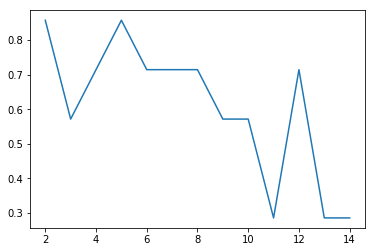

In [66]:
plt.plot(k,acc)